<h1 style="text-align:center;">ESCUELA POLITÉCNICA NACIONAL</h1>
<h2 style="text-align:center;">FACULTAD DE INGENIERÍA DE SISTEMAS</h2>
<h3 style="text-align:center;">INGENIERÍA EN CIENCIA DE LA COMPUTACION</h3>

**PERÍODO ACADÉMICO:** 2025-B  
**ASIGNATURA:** ICCD412 Métodos Numéricos  
**GRUPO:** GR1  
**Taller 2b**   
**ALUMNO:** Carrion Mauricio

In [20]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
%autoreload 2
from src import (
    eliminacion_gaussiana,
    descomposicion_LU,
    resolver_LU,
    matriz_aumentada,
    separar_m_aumentada,
)
import numpy as np
import logging

## 1. Encontrar la matriz inversa de las siguientes matrices:

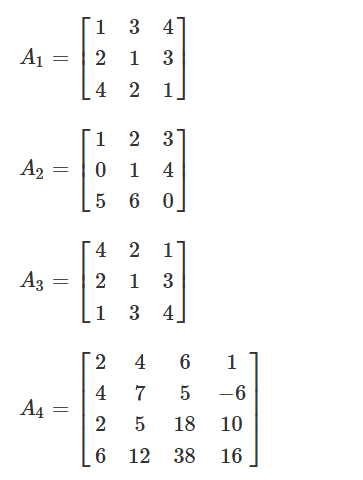

In [22]:
#####################################################################
def gauss_jordan(A: np.ndarray) -> np.ndarray:
    """Realiza la eliminación de Gauss-Jordan

    ## Parameters

    ``A``: matriz del sistema de ecuaciones lineales. Debe ser de tamaño n-by-(k), donde n es el número de incógnitas.

    ## Return

    ``A``: matriz reducida por filas.

    """
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    n = A.shape[0]

    for i in range(0, n):  # loop por columna

        # --- encontrar pivote
        p = None  # default, first element
        for pi in range(i, n):
            if A[pi, i] == 0:
                # must be nonzero
                continue

            if p is None:
                # first nonzero element
                p = pi
                continue

            if abs(A[pi, i]) < abs(A[p, i]):
                p = pi

        if p is None:
            # no pivot found.
            raise ValueError("No existe solución única.")

        if p != i:
            # swap rows
            logging.debug(f"Intercambiando filas {i} y {p}")
            _aux = A[i, :].copy()
            A[i, :] = A[p, :].copy()
            A[p, :] = _aux

        # --- Eliminación: loop por fila
        # for j in range(i + 1, n): # Eliminación gaussiana
        for j in range(n):  # Gauss-Jordan
            if j == i:
                continue  # skip pivot row

            m = A[j, i] / A[i, i]
            A[j, i:] = A[j, i:] - m * A[i, i:]

            # dividir para la diagonal
        A[i, :] = A[i, :] / A[i, i]

        logging.info(f"\n{A}")

    if A[n - 1, n - 1] == 0:
        raise ValueError("No existe solución única.")

        print(f"\n{A}")
    # # --- Sustitución hacia atrás
    # solucion = np.zeros(n)
    # solucion[n - 1] = A[n - 1, n] / A[n - 1, n - 1]

    # for i in range(n - 2, -1, -1):
    #     suma = 0
    #     for j in range(i + 1, n):
    #         suma += A[i, j] * solucion[j]
    #     solucion[i] = (A[i, n] - suma) / A[i, i]

    return A

# Matriz 1

In [23]:
A1 = [
    [1, 3, 4],    
    [2, 1, 3],    
    [4, 2, 1]]
A1

[[1, 3, 4], [2, 1, 3], [4, 2, 1]]

### Juntamos horizontalmente la matriz A junto la Matriz identidad para obtener matriz aumentada

In [24]:
n = len(A1)
A1_aug = np.hstack((A1, np.eye(n)))
A1_aug

array([[1., 3., 4., 1., 0., 0.],
       [2., 1., 3., 0., 1., 0.],
       [4., 2., 1., 0., 0., 1.]])

In [25]:
gauss_jordan(A1_aug)

[01-13 20:57:21][INFO]
[[  1.   3.   4.   1.   0.   0.]
 [  0.  -5.  -5.  -2.   1.   0.]
 [  0. -10. -15.  -4.   0.   1.]]
[01-13 20:57:21][INFO]
[[ 1.   0.   1.  -0.2  0.6  0. ]
 [-0.   1.   1.   0.4 -0.2 -0. ]
 [ 0.   0.  -5.   0.  -2.   1. ]]
[01-13 20:57:21][INFO]
[[ 1.   0.   0.  -0.2  0.2  0.2]
 [-0.   1.   0.   0.4 -0.6  0.2]
 [-0.  -0.   1.  -0.   0.4 -0.2]]


array([[ 1. ,  0. ,  0. , -0.2,  0.2,  0.2],
       [-0. ,  1. ,  0. ,  0.4, -0.6,  0.2],
       [-0. , -0. ,  1. , -0. ,  0.4, -0.2]])

# Matriz 2

In [26]:
A2 = [
    [1, 2, 3],    
    [0, 1, 4],    
    [5, 6, 0],]
A2

[[1, 2, 3], [0, 1, 4], [5, 6, 0]]

In [27]:
n = len(A2)
A2_aug = np.hstack((A2, np.eye(n)))
A2_aug

array([[1., 2., 3., 1., 0., 0.],
       [0., 1., 4., 0., 1., 0.],
       [5., 6., 0., 0., 0., 1.]])

In [28]:
gauss_jordan(A2_aug)

[01-13 20:57:21][INFO]
[[  1.   2.   3.   1.   0.   0.]
 [  0.   1.   4.   0.   1.   0.]
 [  0.  -4. -15.  -5.   0.   1.]]
[01-13 20:57:21][INFO]
[[ 1.  0. -5.  1. -2.  0.]
 [ 0.  1.  4.  0.  1.  0.]
 [ 0.  0.  1. -5.  4.  1.]]
[01-13 20:57:21][INFO]
[[  1.   0.   0. -24.  18.   5.]
 [  0.   1.   0.  20. -15.  -4.]
 [  0.   0.   1.  -5.   4.   1.]]


array([[  1.,   0.,   0., -24.,  18.,   5.],
       [  0.,   1.,   0.,  20., -15.,  -4.],
       [  0.,   0.,   1.,  -5.,   4.,   1.]])

# Matriz 3

In [29]:
A3 = [
    [4, 2, 1],    
    [2, 1, 3],    
    [1, 3, 4],]
A3

[[4, 2, 1], [2, 1, 3], [1, 3, 4]]

In [30]:
n = len(A3)
A3_aug = np.hstack((A3, np.eye(n)))
A3_aug

array([[4., 2., 1., 1., 0., 0.],
       [2., 1., 3., 0., 1., 0.],
       [1., 3., 4., 0., 0., 1.]])

In [31]:
gauss_jordan(A3_aug)

[01-13 20:57:21][INFO]
[[  1.   3.   4.   0.   0.   1.]
 [  0.  -5.  -5.   0.   1.  -2.]
 [  0. -10. -15.   1.   0.  -4.]]
[01-13 20:57:21][INFO]
[[ 1.   0.   1.   0.   0.6 -0.2]
 [-0.   1.   1.  -0.  -0.2  0.4]
 [ 0.   0.  -5.   1.  -2.   0. ]]
[01-13 20:57:21][INFO]
[[ 1.   0.   0.   0.2  0.2 -0.2]
 [-0.   1.   0.   0.2 -0.6  0.4]
 [-0.  -0.   1.  -0.2  0.4 -0. ]]


array([[ 1. ,  0. ,  0. ,  0.2,  0.2, -0.2],
       [-0. ,  1. ,  0. ,  0.2, -0.6,  0.4],
       [-0. , -0. ,  1. , -0.2,  0.4, -0. ]])

## Matriz 4

In [32]:
A4 = [
    [2, 4 , 6 , 1 ],    
    [4, 7, 5 , -6],    
    [2, 5, 18 , 10],
    [6, 12, 38 , 16],]
A4

[[2, 4, 6, 1], [4, 7, 5, -6], [2, 5, 18, 10], [6, 12, 38, 16]]

In [33]:
n = len(A4)
A4_aug = np.hstack((A4, np.eye(n)))
A4_aug

array([[ 2.,  4.,  6.,  1.,  1.,  0.,  0.,  0.],
       [ 4.,  7.,  5., -6.,  0.,  1.,  0.,  0.],
       [ 2.,  5., 18., 10.,  0.,  0.,  1.,  0.],
       [ 6., 12., 38., 16.,  0.,  0.,  0.,  1.]])

In [34]:
gauss_jordan(A4_aug)

[01-13 20:57:21][INFO]
[[ 1.   2.   3.   0.5  0.5  0.   0.   0. ]
 [ 0.  -1.  -7.  -8.  -2.   1.   0.   0. ]
 [ 0.   1.  12.   9.  -1.   0.   1.   0. ]
 [ 0.   0.  20.  13.  -3.   0.   0.   1. ]]
[01-13 20:57:21][INFO]
[[  1.    0.  -11.  -15.5  -3.5   2.    0.    0. ]
 [ -0.    1.    7.    8.    2.   -1.   -0.   -0. ]
 [  0.    0.    5.    1.   -3.    1.    1.    0. ]
 [  0.    0.   20.   13.   -3.    0.    0.    1. ]]
[01-13 20:57:21][INFO]
[[  1.    0.    0.  -13.3 -10.1   4.2   2.2   0. ]
 [ -0.    1.    0.    6.6   6.2  -2.4  -1.4  -0. ]
 [  0.    0.    1.    0.2  -0.6   0.2   0.2   0. ]
 [  0.    0.    0.    9.    9.   -4.   -4.    1. ]]
[01-13 20:57:21][INFO]
[[ 1.          0.          0.          0.          3.2        -1.71111111
  -3.71111111  1.47777778]
 [-0.          1.          0.          0.         -0.4         0.53333333
   1.53333333 -0.73333333]
 [ 0.          0.          1.          0.         -0.8         0.28888889
   0.28888889 -0.02222222]
 [ 0.          0.     

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  3.2       ,
        -1.71111111, -3.71111111,  1.47777778],
       [-0.        ,  1.        ,  0.        ,  0.        , -0.4       ,
         0.53333333,  1.53333333, -0.73333333],
       [ 0.        ,  0.        ,  1.        ,  0.        , -0.8       ,
         0.28888889,  0.28888889, -0.02222222],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
        -0.44444444, -0.44444444,  0.11111111]])

## 2. Calcule la descomposición LU para estas matrices y encuentre la solución para estos vectores de valores independientes b

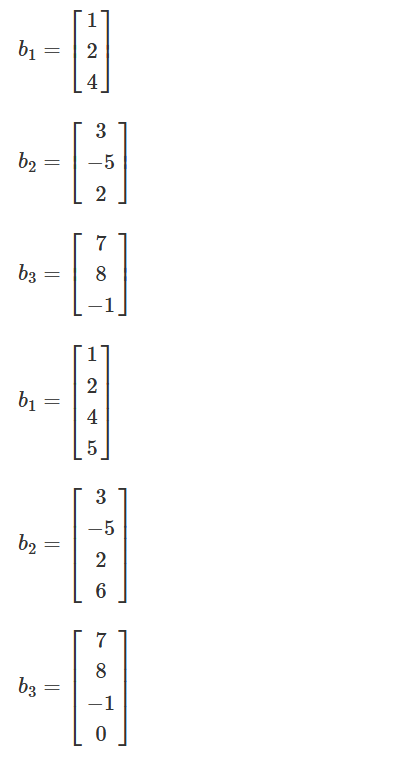

Mostrar el valor de la variable intermedia y del proceso de descomposicion LU.

In [42]:
L1, U1 = descomposicion_LU(A1)
b1 = np.array([1 , 2 , 4])
L1, U1

[01-13 20:58:29][INFO]
[[  1.   3.   4.]
 [  0.  -5.  -5.]
 [  0. -10. -15.]]
[01-13 20:58:29][INFO]
[[ 1.  3.  4.]
 [ 0. -5. -5.]
 [ 0.  0. -5.]]
[01-13 20:58:29][INFO]
[[ 1.  3.  4.]
 [ 0. -5. -5.]
 [ 0.  0. -5.]]


(array([[1., 0., 0.],
        [2., 1., 0.],
        [4., 2., 1.]]),
 array([[ 1.,  3.,  4.],
        [ 0., -5., -5.],
        [ 0.,  0., -5.]]))

In [36]:
resolver_LU(L1, U1, b1)

[01-13 20:57:21][INFO]SustituciÃ³n hacia adelante
[01-13 20:57:21][INFO]y = 
[[1.]
 [0.]
 [0.]]
[01-13 20:57:21][INFO]SustituciÃ³n hacia atrÃ¡s
[01-13 20:57:21][INFO]i = 1
[01-13 20:57:21][INFO]suma = [0.]
[01-13 20:57:21][INFO]U[i, i] = -5.0
[01-13 20:57:21][INFO]y[i] = [0.]
[01-13 20:57:21][INFO]i = 0
[01-13 20:57:21][INFO]suma = [0.]
[01-13 20:57:21][INFO]U[i, i] = 1.0
[01-13 20:57:21][INFO]y[i] = [1.]


array([[ 1.],
       [-0.],
       [-0.]])

In [47]:
L2, U2 = descomposicion_LU(A2)
b2 = np.array([3 , -5 , 2])
L2, U2

[01-13 20:59:39][INFO]
[[  1.   2.   3.]
 [  0.   1.   4.]
 [  0.  -4. -15.]]
[01-13 20:59:39][INFO]
[[1. 2. 3.]
 [0. 1. 4.]
 [0. 0. 1.]]
[01-13 20:59:39][INFO]
[[1. 2. 3.]
 [0. 1. 4.]
 [0. 0. 1.]]


(array([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 5., -4.,  1.]]),
 array([[1., 2., 3.],
        [0., 1., 4.],
        [0., 0., 1.]]))

In [44]:
resolver_LU(L2, U2, b2)

[01-13 20:59:06][INFO]SustituciÃ³n hacia adelante
[01-13 20:59:06][INFO]y = 
[[  3.]
 [ -5.]
 [-33.]]
[01-13 20:59:06][INFO]SustituciÃ³n hacia atrÃ¡s
[01-13 20:59:06][INFO]i = 1
[01-13 20:59:06][INFO]suma = [-132.]
[01-13 20:59:06][INFO]U[i, i] = 1.0
[01-13 20:59:06][INFO]y[i] = [-5.]
[01-13 20:59:06][INFO]i = 0
[01-13 20:59:06][INFO]suma = [155.]
[01-13 20:59:06][INFO]U[i, i] = 1.0
[01-13 20:59:06][INFO]y[i] = [3.]


array([[-152.],
       [ 127.],
       [ -33.]])

In [ ]:
# No se puede aplicar LU directamente ya que A3 requiere de intercambio de filas
descomposicion_LU(A3)

[01-13 20:57:21][INFO]
[[4.   2.   1.  ]
 [0.   0.   2.5 ]
 [0.   2.5  3.75]]


ValueError: No existe solución única.

In [49]:
L4, U4 = descomposicion_LU(A4)
b1 = np.array([1 , 2 , 4, 5])
b2 = np.array([3 , -5 , 2, 6])
b3 = np.array([7, 8, -1, 0])
L4, U4 


[01-13 21:05:38][INFO]
[[ 2.  4.  6.  1.]
 [ 0. -1. -7. -8.]
 [ 0.  1. 12.  9.]
 [ 0.  0. 20. 13.]]
[01-13 21:05:38][INFO]
[[ 2.  4.  6.  1.]
 [ 0. -1. -7. -8.]
 [ 0.  0.  5.  1.]
 [ 0.  0. 20. 13.]]
[01-13 21:05:38][INFO]
[[ 2.  4.  6.  1.]
 [ 0. -1. -7. -8.]
 [ 0.  0.  5.  1.]
 [ 0.  0.  0.  9.]]
[01-13 21:05:38][INFO]
[[ 2.  4.  6.  1.]
 [ 0. -1. -7. -8.]
 [ 0.  0.  5.  1.]
 [ 0.  0.  0.  9.]]


(array([[ 1.,  0.,  0.,  0.],
        [ 2.,  1.,  0.,  0.],
        [ 1., -1.,  1.,  0.],
        [ 3., -0.,  4.,  1.]]),
 array([[ 2.,  4.,  6.,  1.],
        [ 0., -1., -7., -8.],
        [ 0.,  0.,  5.,  1.],
        [ 0.,  0.,  0.,  9.]]))

In [50]:
resolver_LU(L4, U4, b1)

[01-13 21:05:56][INFO]SustituciÃ³n hacia adelante
[01-13 21:05:56][INFO]y = 
[[  1.]
 [  0.]
 [  3.]
 [-10.]]
[01-13 21:05:56][INFO]SustituciÃ³n hacia atrÃ¡s
[01-13 21:05:56][INFO]i = 2
[01-13 21:05:56][INFO]suma = [-1.11111111]
[01-13 21:05:56][INFO]U[i, i] = 5.0
[01-13 21:05:56][INFO]y[i] = [3.]
[01-13 21:05:56][INFO]i = 1
[01-13 21:05:56][INFO]suma = [3.13333333]
[01-13 21:05:56][INFO]U[i, i] = -1.0
[01-13 21:05:56][INFO]y[i] = [0.]
[01-13 21:05:56][INFO]i = 0
[01-13 21:05:56][INFO]suma = [16.35555556]
[01-13 21:05:56][INFO]U[i, i] = 2.0
[01-13 21:05:56][INFO]y[i] = [1.]


array([[-7.67777778],
       [ 3.13333333],
       [ 0.82222222],
       [-1.11111111]])

In [51]:
resolver_LU(L4, U4, b2)

[01-13 21:06:16][INFO]SustituciÃ³n hacia adelante
[01-13 21:06:16][INFO]y = 
[[  3.]
 [-11.]
 [-12.]
 [ 45.]]
[01-13 21:06:16][INFO]SustituciÃ³n hacia atrÃ¡s
[01-13 21:06:16][INFO]i = 2
[01-13 21:06:16][INFO]suma = [5.]
[01-13 21:06:16][INFO]U[i, i] = 5.0
[01-13 21:06:16][INFO]y[i] = [-12.]
[01-13 21:06:16][INFO]i = 1
[01-13 21:06:16][INFO]suma = [-16.2]
[01-13 21:06:16][INFO]U[i, i] = -1.0
[01-13 21:06:16][INFO]y[i] = [-11.]
[01-13 21:06:16][INFO]i = 0
[01-13 21:06:16][INFO]suma = [-36.2]
[01-13 21:06:16][INFO]U[i, i] = 2.0
[01-13 21:06:16][INFO]y[i] = [3.]


array([[19.6],
       [-5.2],
       [-3.4],
       [ 5. ]])

In [52]:
resolver_LU(L4, U4, b3)

[01-13 21:06:19][INFO]SustituciÃ³n hacia adelante
[01-13 21:06:19][INFO]y = 
[[  7.]
 [ -6.]
 [-14.]
 [ 35.]]
[01-13 21:06:19][INFO]SustituciÃ³n hacia atrÃ¡s
[01-13 21:06:19][INFO]i = 2
[01-13 21:06:19][INFO]suma = [3.88888889]
[01-13 21:06:19][INFO]U[i, i] = 5.0
[01-13 21:06:19][INFO]y[i] = [-14.]
[01-13 21:06:19][INFO]i = 1
[01-13 21:06:19][INFO]suma = [-6.06666667]
[01-13 21:06:19][INFO]U[i, i] = -1.0
[01-13 21:06:19][INFO]y[i] = [-6.]
[01-13 21:06:19][INFO]i = 0
[01-13 21:06:19][INFO]suma = [-17.84444444]
[01-13 21:06:19][INFO]U[i, i] = 2.0
[01-13 21:06:19][INFO]y[i] = [7.]


array([[12.42222222],
       [-0.06666667],
       [-3.57777778],
       [ 3.88888889]])